In [1]:
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [8]:
DB = DBSCAN(eps=0.6, min_samples=6, metric='euclidean')
DB_labels = DB.fit_predict(iris.data)
iris_df['DBSCAN_cluster'] = DB_labels
# -1 값은 noise 이다
iris_df.groupby('target')['DBSCAN_cluster'].value_counts()

target  DBSCAN_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                44
        -1                 6
Name: DBSCAN_cluster, dtype: int64

In [25]:
def visualize_cluster(clusterobj, dataframe, label_name, iscenter=True):
  if iscenter:
    centers = clusterobj.cluster_centers_

  unique_labels = np.unique(dataframe[label_name].values)
  markers=['o', 's', '^', 'x', '*']
  isNoise=False

  for label in unique_labels:
    label_cluster = dataframe[dataframe[label_name]==label]
    if label == -1:
       cluster_legend = 'Noise'
       isNoise=True
    else :
      cluster_legend = 'Cluster' +str(label)

    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)

    if iscenter :
      center_x_y = centers[label]
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha = 0.9, edgecolor='k', marker=markers[label])
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
  if isNoise:
    legend_loc = 'upper center'
  else:
    legend_loc = 'upper right'

  plt.legend(loc=legend_loc)
  plt.show()

**PCA로 차원축소 후 시각화**

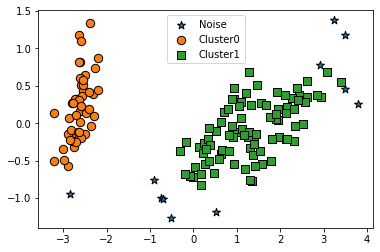

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transform = pca.fit_transform(iris.data)
iris_df['pca_1'] = pca_transform[:,0]
iris_df['pca_2'] = pca_transform[:,1]

visualize_cluster(DB, iris_df, 'DBSCAN_cluster', False)

**eps 크기 증가**

noise가 줄어든것을 볼수있다

target  DBSCAN_cluster_2
0        0                  50
1        1                  50
2        1                  47
        -1                   3
Name: DBSCAN_cluster_2, dtype: int64


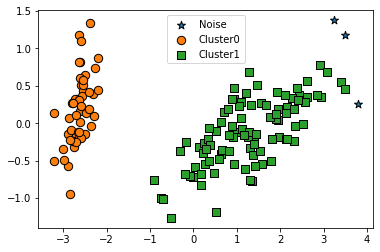

In [32]:
DB_2 = DBSCAN(eps=0.8, min_samples=8, metric = 'euclidean')
DB_2_labels = DB_2.fit_predict(iris.data)
iris_df['DBSCAN_cluster_2'] = DB_2_labels
print(iris_df.groupby('target')['DBSCAN_cluster_2'].value_counts())

visualize_cluster(DB_2, iris_df, 'DBSCAN_cluster_2', iscenter=False)

**min_samples 증가**

noise가 증가한것을 볼수있다

target  DBSCAN_cluster_3
0        0                  48
        -1                   2
1        1                  44
        -1                   6
2        1                  36
        -1                  14
Name: DBSCAN_cluster_3, dtype: int64


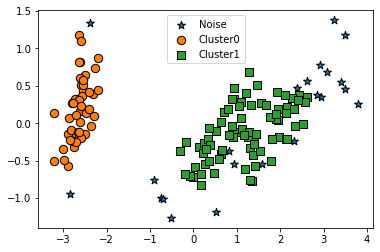

In [34]:
DB_3 = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
DB_3_labels = DB_3.fit_predict(iris.data)
iris_df['DBSCAN_cluster_3'] = DB_3_labels
print(iris_df.groupby('target')['DBSCAN_cluster_3'].value_counts())

visualize_cluster(DB_3, iris_df, 'DBSCAN_cluster_3', False)

# Make_circles 데이터 세트

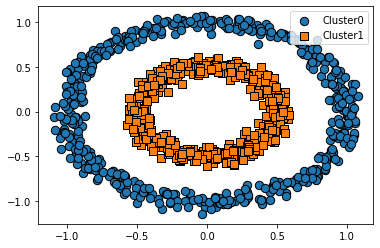

In [39]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5)
cluster_df = pd.DataFrame(data=X, columns=['pca_1', 'pca_2'])
cluster_df['target'] = y
visualize_cluster(None, cluster_df, 'target', False)

**KMeans 로 확인**

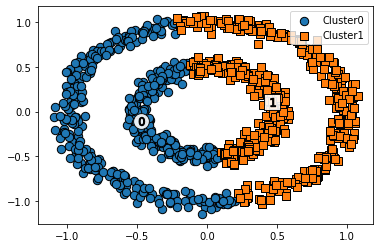

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels

visualize_cluster(kmeans, cluster_df, 'kmeans_cluster', True)

**GMM 으로 확인**

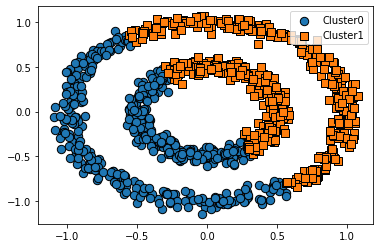

In [48]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2)
GMM_labels = GMM.fit_predict(X)
cluster_df['GMM_cluster'] = GMM_labels

visualize_cluster(GMM, cluster_df, 'GMM_cluster', False)

**DBSCAN 으로 확인**

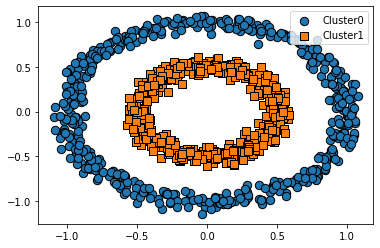

In [49]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['DBSCAN_cluster'] = dbscan_labels

visualize_cluster(dbscan, cluster_df, 'DBSCAN_cluster', False)